In [1]:
import matplotlib.pyplot as plt
import cv2
import os

BASEPATH = r"resource/"
ORIPATH = f"{BASEPATH}raw/"
RESULTPATH = f"{BASEPATH}result/"
DISPLAYPATH = f"{BASEPATH}outputForDisplay/"
SEQUENCE = ["Grayscale", "Frequency Domain", "Gaussian Filter", "Spatial Domain"]
FILENAME = ["gray", "fft", "gaussian", "ifft"]

def displayImage(platform, image) :
    resultPath = f"{RESULTPATH}{platform}/"
    fileName = os.path.splitext(image)[0]

    plt.figure(figsize=(20, 5))

    plt.suptitle(f"{platform} Result ({fileName})", fontsize=20)

    originalImage = cv2.imread(f"{ORIPATH}{image}")
    
    # show the first
    plt.subplot(1, 5, 1)
    plt.imshow(cv2.cvtColor(originalImage, cv2.COLOR_BGR2RGB))
    plt.title("Original")
    plt.axis('off')

    for i in range(2, 6):
        # read image
        frame = cv2.imread(f"{resultPath}{fileName}_{FILENAME[i - 2]}.jpg")
        
        # set location
        plt.subplot(1, 5, i)

        plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

        # set name
        plt.title(SEQUENCE[i - 2])
        plt.axis('off')

    plt.show()

def showGrayscaleAndImprove(platform, imName) :
    resultPath = f"{RESULTPATH}{platform}/"
    
    plt.figure(figsize=(20, 20))
    
    grayscale = cv2.imread(f"{resultPath}{imName}_gray.jpg")
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(grayscale, cv2.COLOR_BGR2RGB))
    plt.title("Grayscale")
    plt.axis('off')

    ifft = cv2.imread(f"{resultPath}{imName}_ifft.jpg")
    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(ifft, cv2.COLOR_BGR2RGB))
    plt.title("Result")
    plt.axis('off')

    plt.show()

def showMultiple(col, imPath, title=None, figsize=None) :
    if figsize is None :
        plt.figure(figsize=(20,20))
    else : 
        plt.figure(figsize=figsize)
        
    row = int(len(imPath)/col)

    i = 0
    for path in imPath : 
        image = cv2.imread(path)
        plt.subplot(row, col, i + 1)

        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        if title is not None : 
            plt.title(title[i])
        plt.axis('off')
        i += 1

    plt.tight_layout()
    plt.show()

def getPath(type) : 
    return [
        f"{DISPLAYPATH}lena_{type}.png",
        f"{DISPLAYPATH}doggo_{type}.png",
        f"{DISPLAYPATH}wolf_{type}.png",
        f"{DISPLAYPATH}cameragirl_{type}.png",
    ]

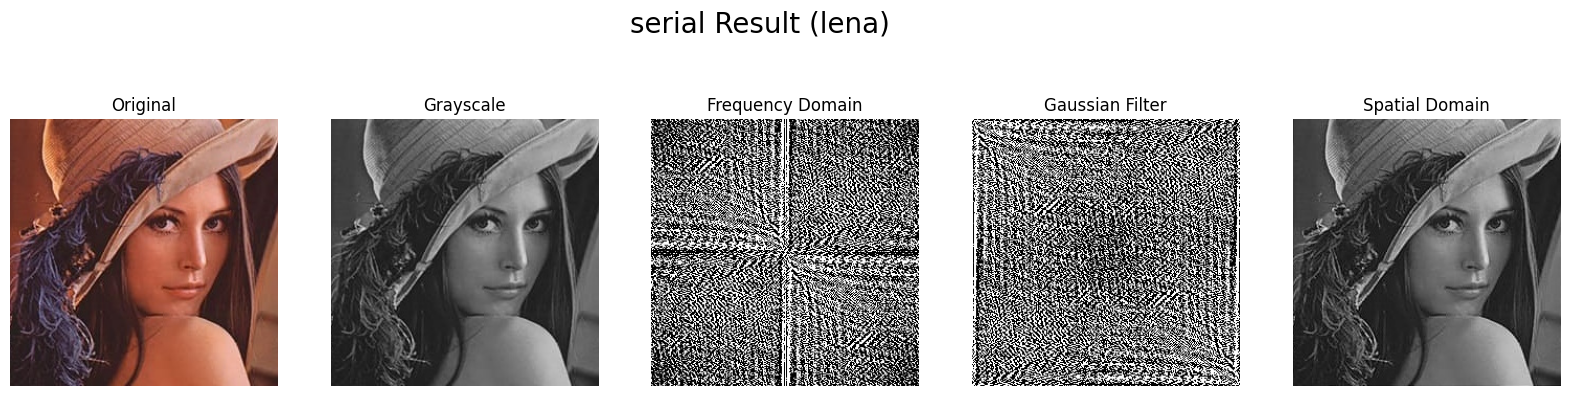

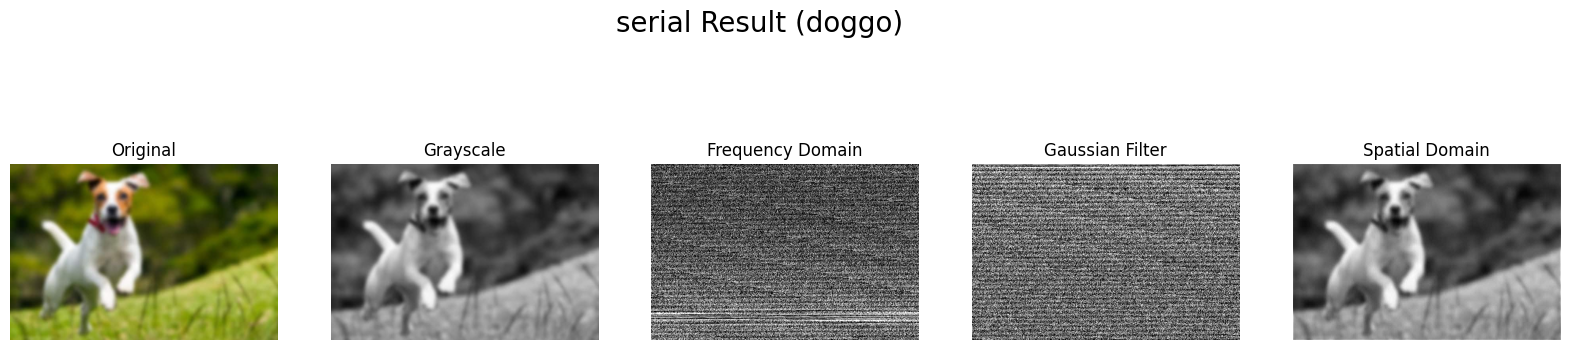

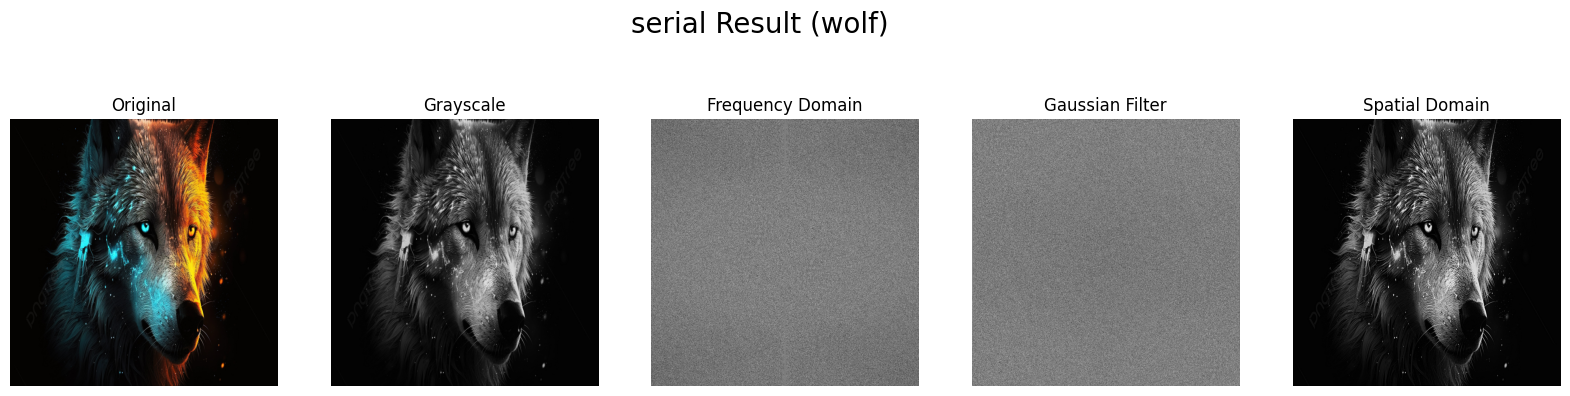

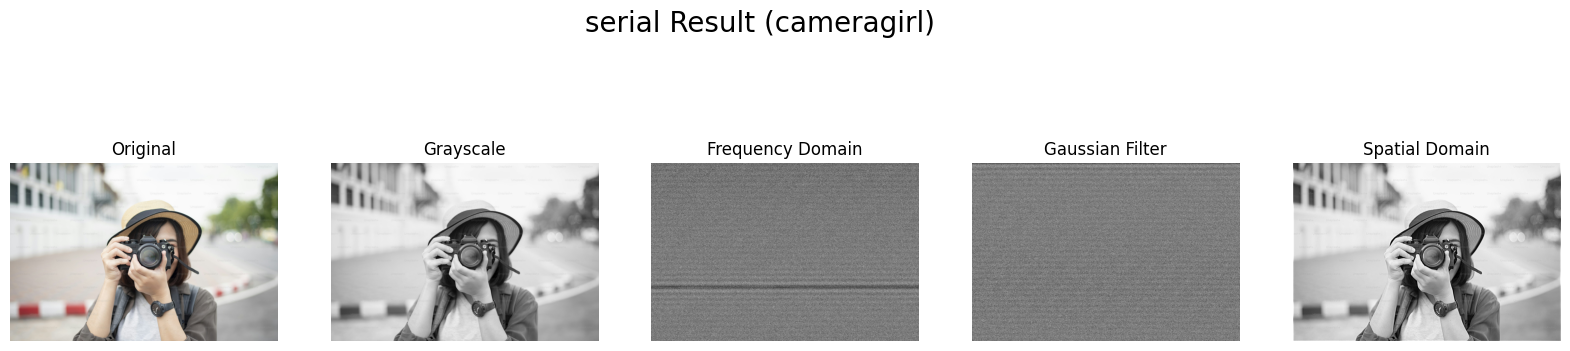

In [2]:
displayImage("serial", "lena.jpeg")
print("\n")
displayImage("serial", "doggo.jpg")
print("\n")
displayImage("serial", "wolf.jpg")
print("\n")
displayImage("serial", "cameragirl.jpeg")

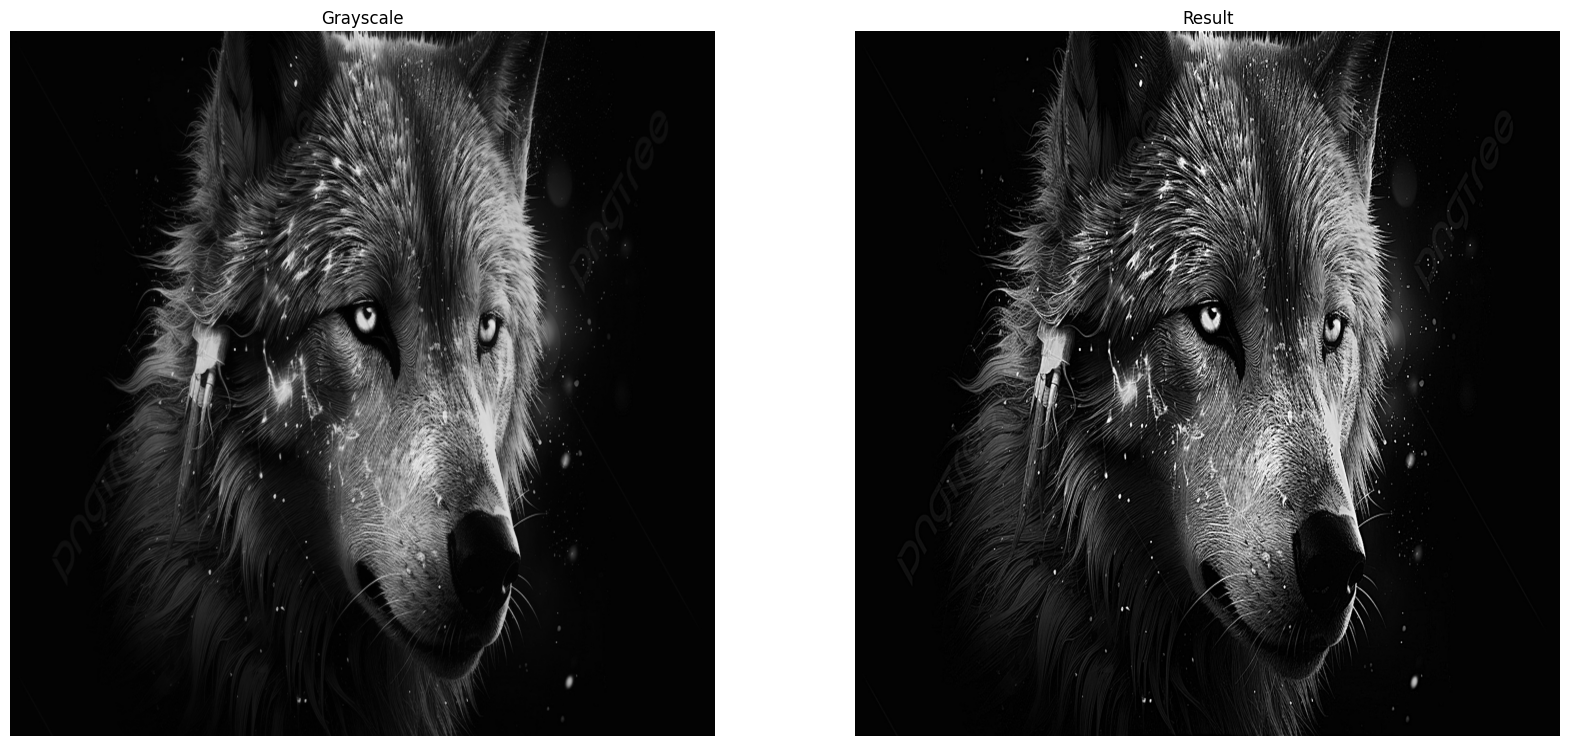

In [3]:
showGrayscaleAndImprove("serial", "wolf")

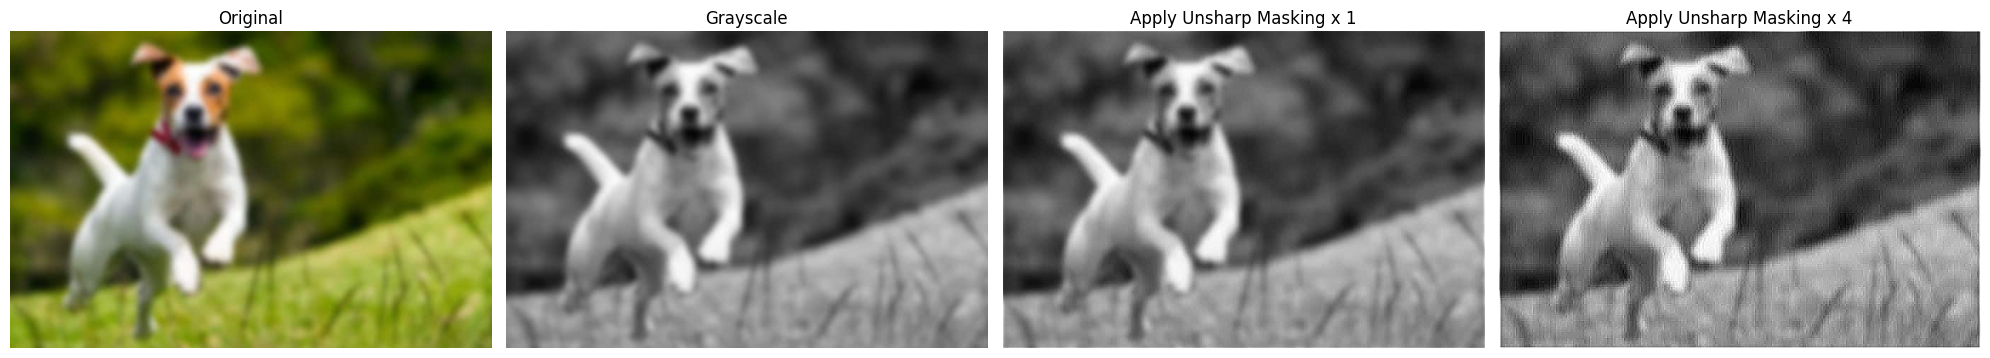

In [4]:
# display doggo apply for 4 times filter vs apply 1 times 
imPath = [
    f"{DISPLAYPATH}doggo_original.jpg",
    f"{DISPLAYPATH}doggo_gray.jpg",
    f"{DISPLAYPATH}doggo_ifft_1_run.jpg",
    f"{DISPLAYPATH}doggo_ifft_4_runs.jpg",
]

title = [
    "Original",
    "Grayscale", 
    "Apply Unsharp Masking x 1",
    "Apply Unsharp Masking x 4",
]

showMultiple(col=4, imPath=imPath, title=title)

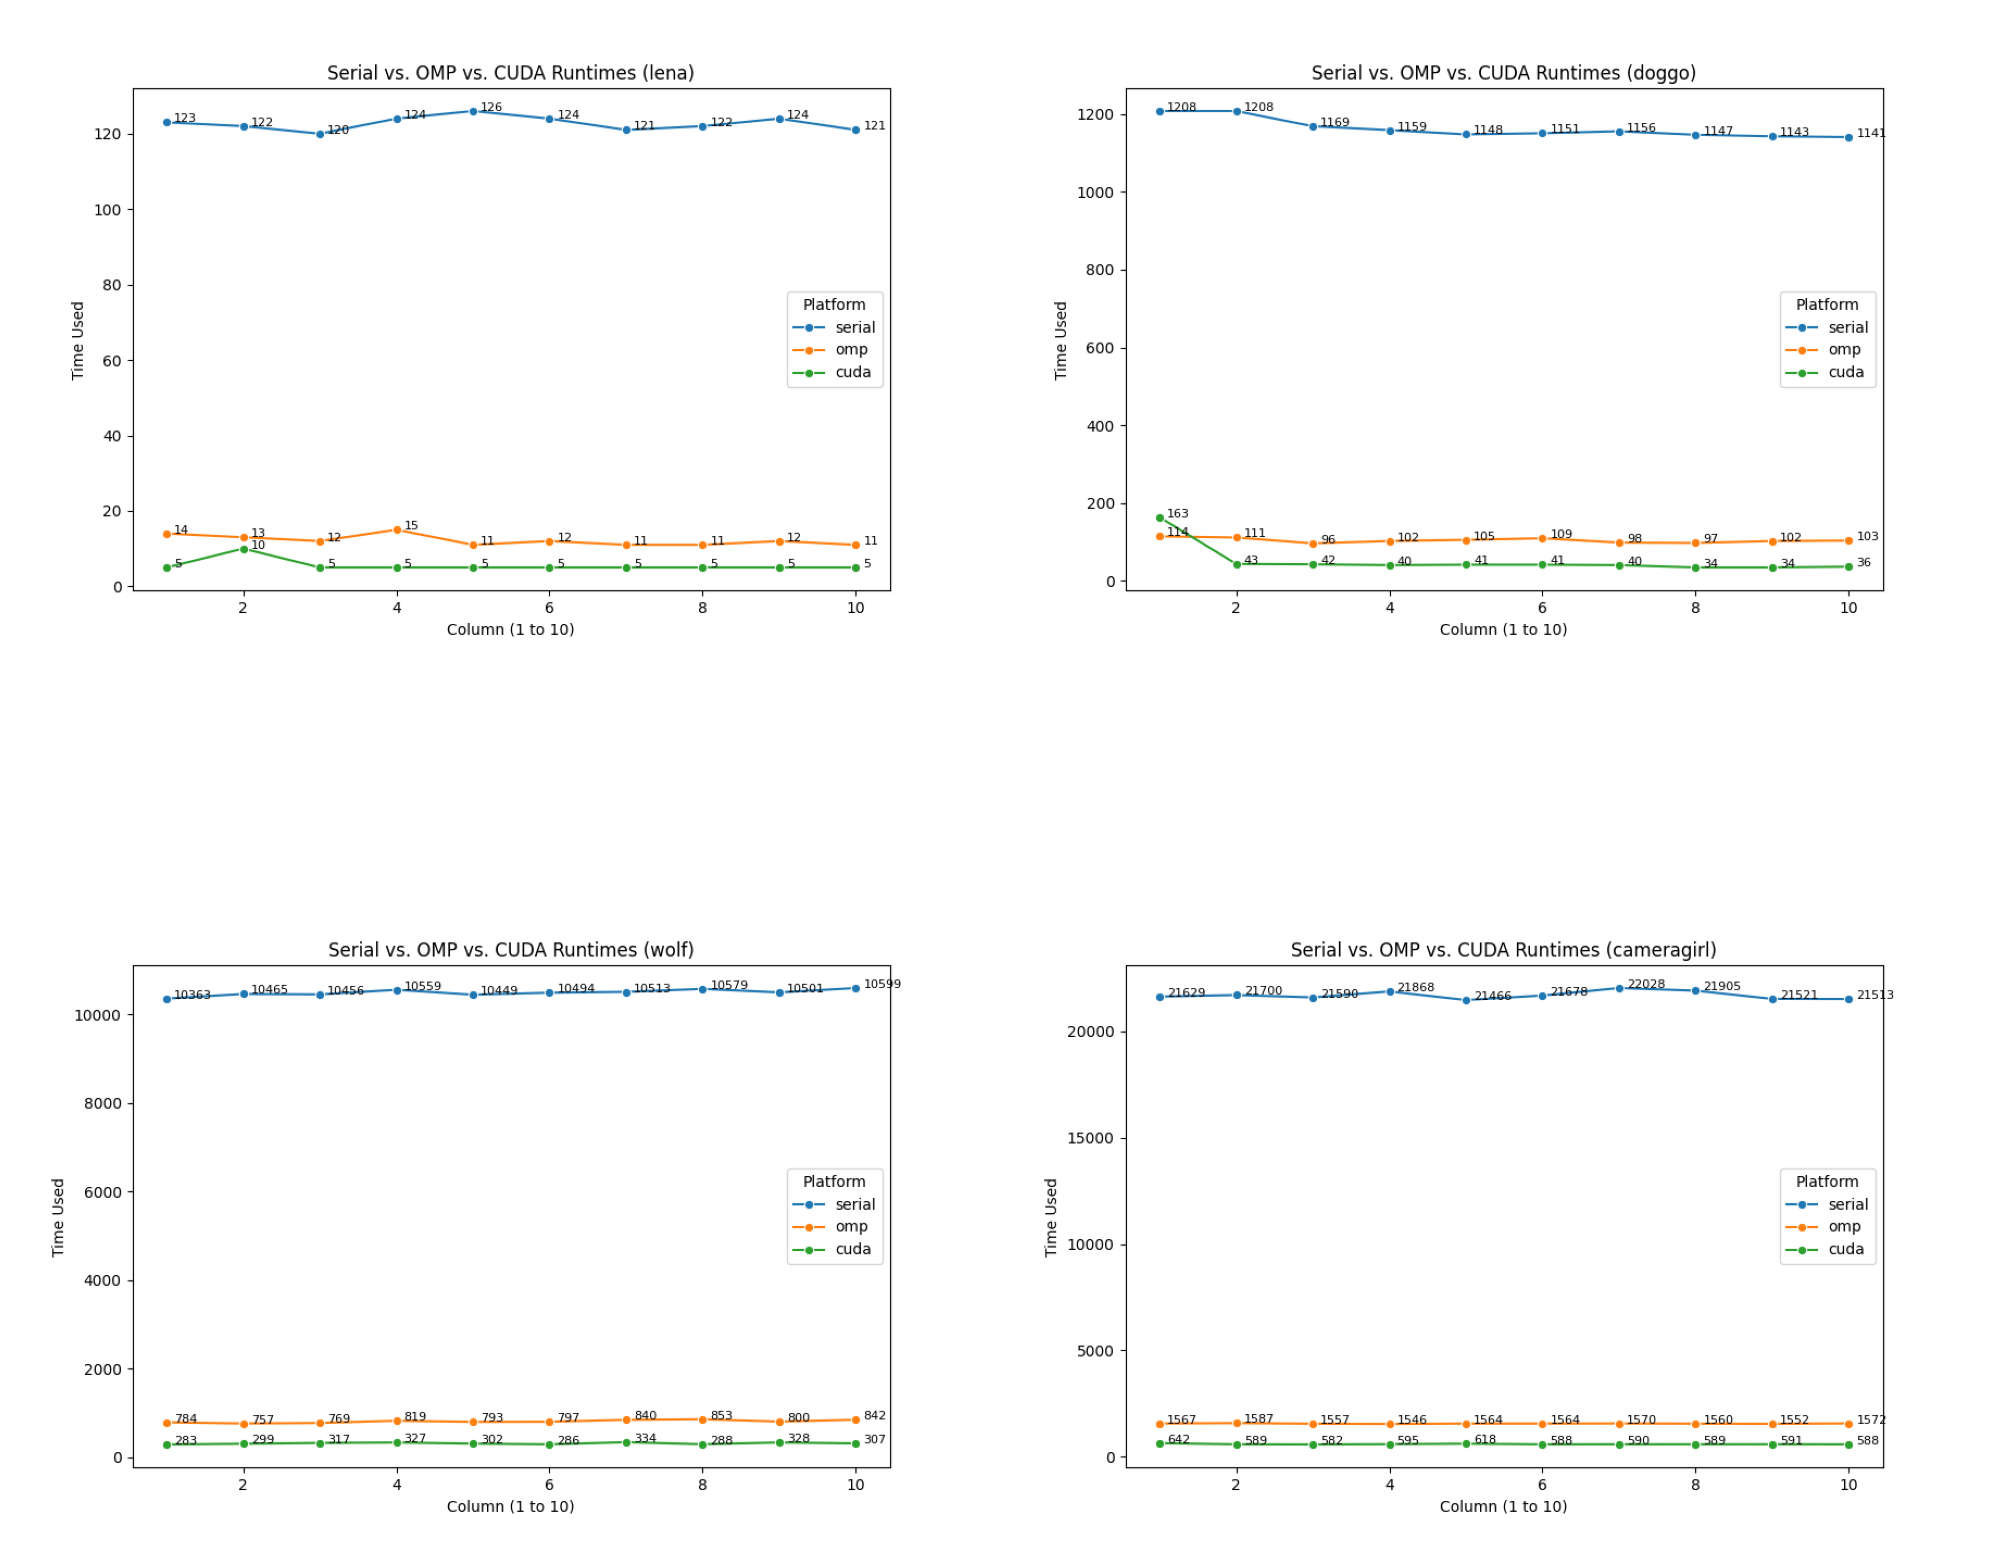

In [5]:
# 10 times runtime 
imPath = getPath("runtime")

showMultiple(col=2, imPath=imPath)

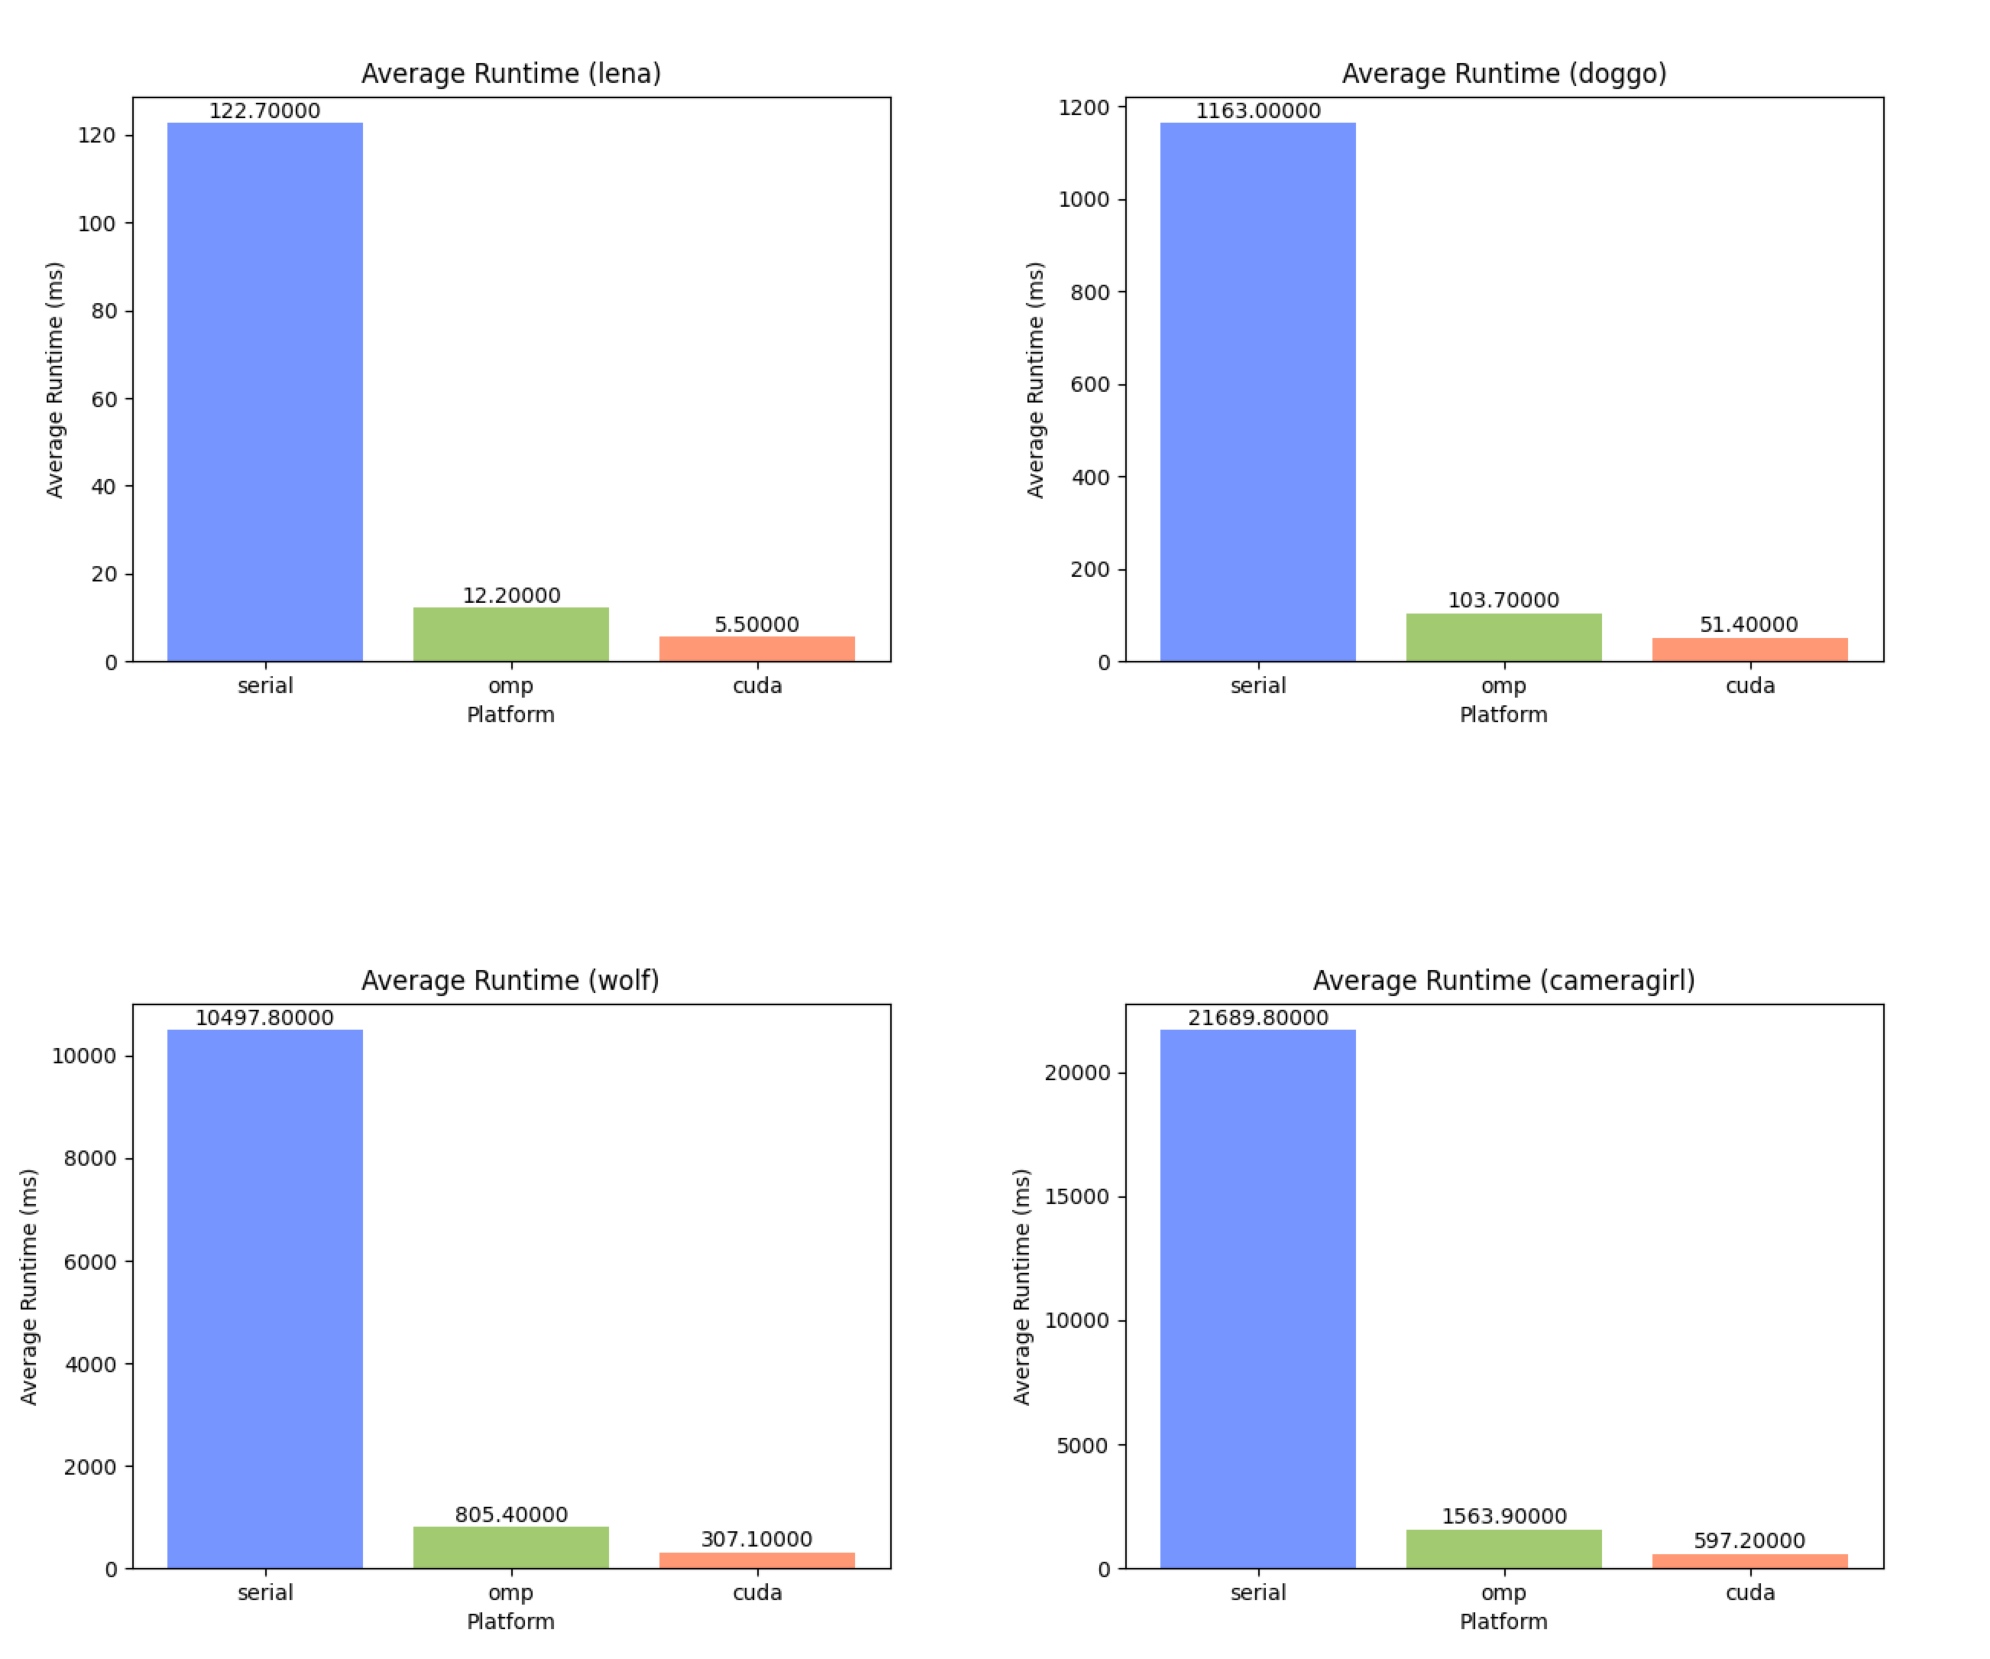

In [6]:
imPath = getPath("avgruntime")

showMultiple(col=2, imPath=imPath)

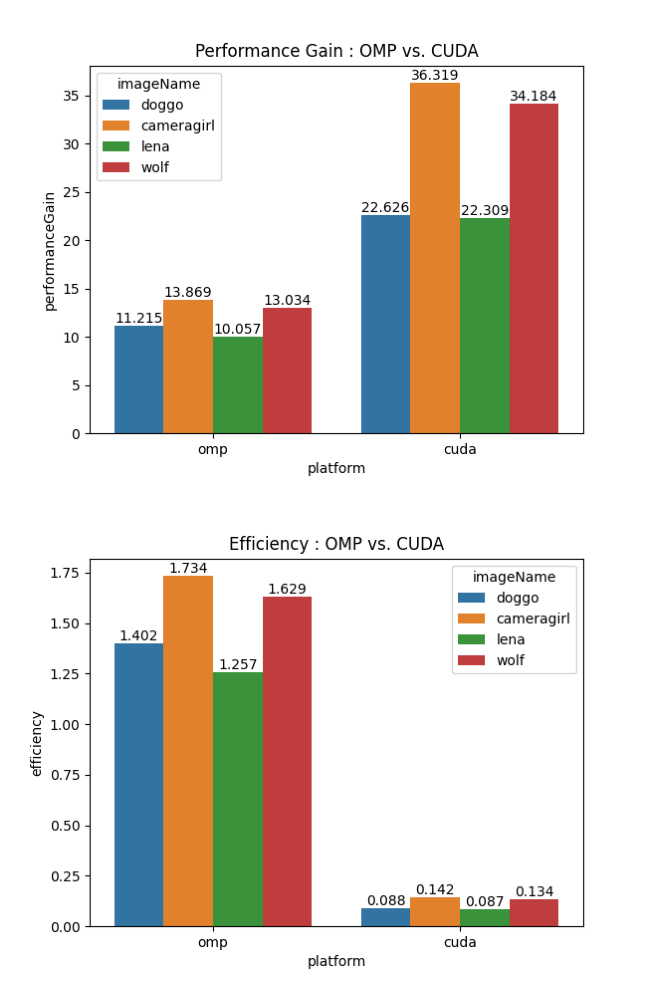

In [7]:
imPath = [
    f"{DISPLAYPATH}peformanceGain.png",
    f"{DISPLAYPATH}efficiency.png",
]
showMultiple(col=1, imPath=imPath, figsize=(10,10))